# Importing necessary modules

In [19]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") 
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore')
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [2]:
hr=pd.read_csv(r"K:\Desktop\NIIT\Practice\Course9\DS2_C5_S3_HR_Data_Practice.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


<AxesSubplot: xlabel='left'>

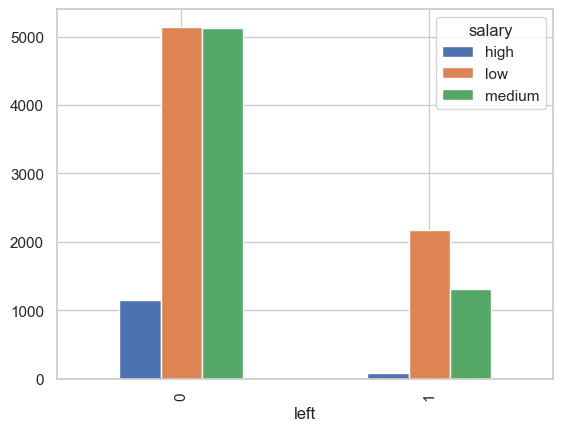

In [5]:
pd.crosstab(hr["left"],hr["salary"]).plot(kind="bar")

<AxesSubplot: xlabel='left'>

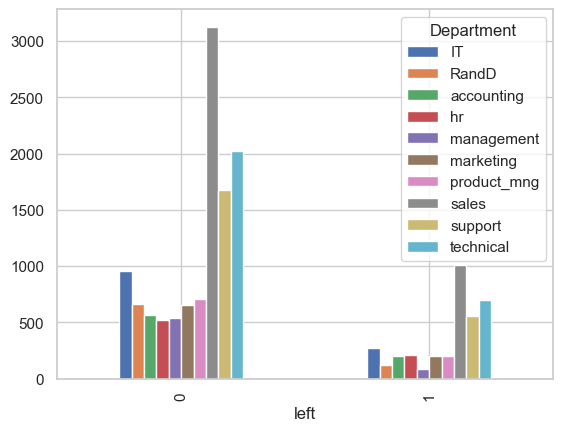

In [6]:
pd.crosstab(hr["left"],hr["Department"]).plot(kind="bar")

<AxesSubplot: >

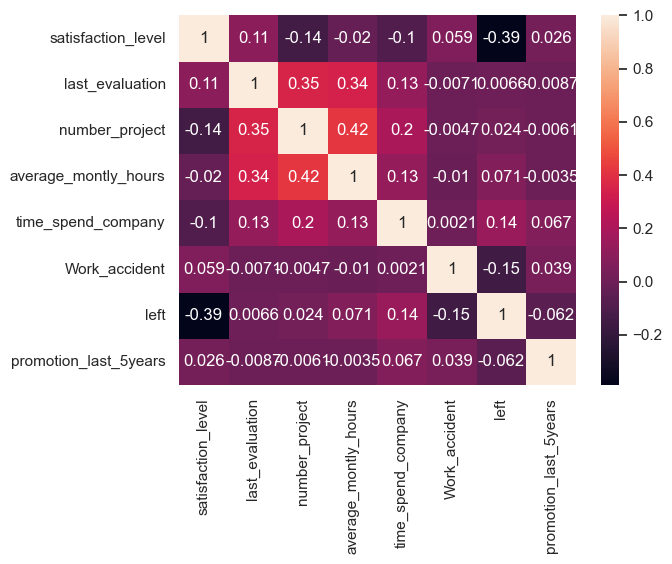

In [7]:
sns.heatmap(hr.corr(),annot=True)

## Splitting and labelencoding

In [8]:
labeler=LabelEncoder()
hr1=hr.copy()
hr1.salary=labeler.fit_transform(hr.salary)
hr1.Department=labeler.fit_transform(hr.Department)

In [9]:
print("department have no influence on attrition ")

department have no influence on attrition 


In [10]:
model=LogisticRegression()
ts_score=[]
ts_rsme=[]
for j in range(500):
        df_train, df_test = train_test_split(hr1,train_size = 0.8,random_state=j)
        x_train=df_train.drop(columns="left",axis=1)
        x_test=df_test.drop(columns="left",axis=1)
        y_train=df_train["left"]
        y_test=df_test["left"]
        model.fit(x_train,y_train)
        ts_score.append(model.score(x_test, y_test))
        y_pred =model.predict(x_test)
J = ts_score.index(np.max(ts_score))
print(J)    

298


In [11]:
df_train, df_test = train_test_split(hr1,train_size = 0.8,random_state=298)

In [12]:
x_train=df_train.drop(columns="left",axis=1)
x_test=df_test.drop(columns="left",axis=1)
y_train=df_train["left"]
y_test=df_test["left"]

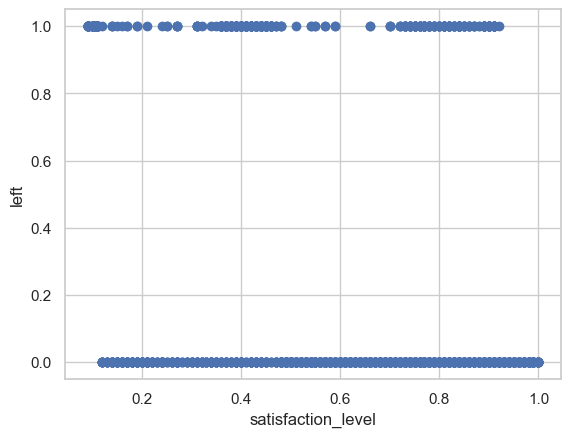

In [13]:
plt.scatter(x_test['satisfaction_level'],y_test)
plt.xlabel('satisfaction_level')
plt.ylabel("left")
plt.show()


In [14]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

Y_pred = lr.predict(x_test)

acc = round(lr.score(x_train, y_train) * 100, 2)
acc

76.98

In [15]:
test_acc=round(lr.score(x_test,y_test)*100,2)
test_acc

79.03

In [17]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))
print()
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp)
print()

from sklearn.metrics import roc_auc_score
rc=roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])
rc

print("ROC : %.3f" % rc)
print()
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


acc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % acc)

[[2023  287]
 [ 614   76]]

2023 287 614 76

ROC : 0.820

AUC: 0.493


In [21]:
print("Recal score : ",recall_score(y_test,y_pred,average="weighted"))
print("Precision_score : ",precision_score(y_test,y_pred,average="weighted"))
print("Acuuracy_score : ",accuracy_score(y_test,y_pred))
print('f1-score:', f1_score(y_test, y_pred,average='weighted'))

Recal score :  0.6996666666666667
Precision_score :  0.6388672013338472
Acuuracy_score :  0.6996666666666667
f1-score: 0.6629598300388677


In [24]:
from sklearn.datasets import make_classification

In [25]:
ns_probs = [0 for i in range(len(y_test))]

In [32]:
lr_probs = lr.predict_proba(x_test)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.820


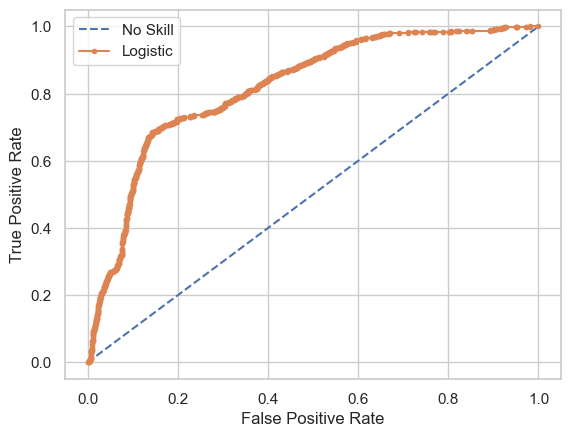

In [29]:
lr_probs = lr.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

## Conclusion : 
The logistic regression model has:

Accuracy: 0.70
Recall: 0.70
Precision: 0.64
F1-score: 0.66
The model is performing average, with an accuracy slightly better than the baseline of 0.50. However, there is scope for improvement in terms of precision.

The model has a precision score of 0.64, which means only 64% of positive predictions are accurate.

The logistic regression model has:

ROC score: 0.82 (good)
AUC score: 0.493 (average)
The ROC score is good, but the AUC score is average, meaning the model's performance can be improved.

Further optimization is needed to achieve higher AUC scores.